In [31]:
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns


In [16]:
df_stores = pd.read_csv(r"C:\Users\gcampos\OneDrive - JACTO\Área de Trabalho\XGBOOST\stores.csv")

In [21]:
df_features = pd.read_csv("features.csv")

In [35]:
# Supondo que df_features é seu DataFrame
print(df_features.columns)
print(df_features.dtypes)


Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')
Store                    int64
Date            datetime64[ns]
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
IsHoliday                 bool
dtype: object


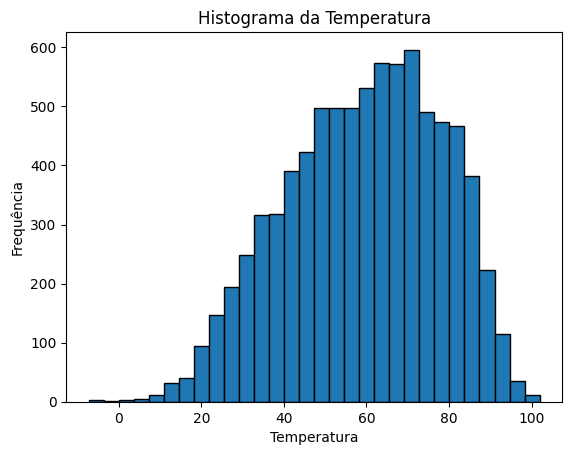

In [36]:
import matplotlib.pyplot as plt

plt.hist(df_features['Temperature'], bins=30, edgecolor='black')
plt.title('Histograma da Temperatura')
plt.xlabel('Temperatura')
plt.ylabel('Frequência')
plt.show()


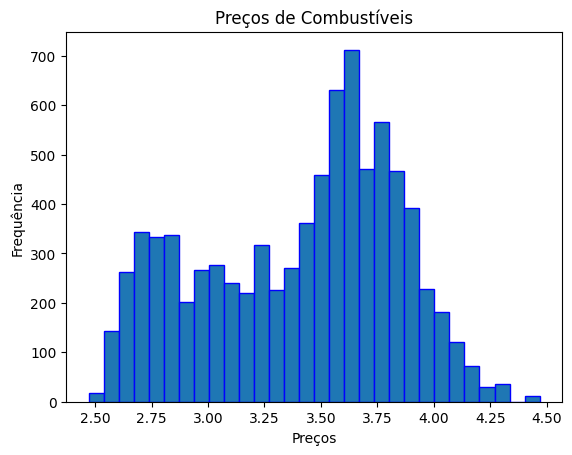

In [37]:
plt.hist(df_features['Fuel_Price'], bins=30, edgecolor='blue')
plt.title('Preços de Combustíveis')
plt.xlabel('Preços')
plt.ylabel('Frequência')
plt.show()

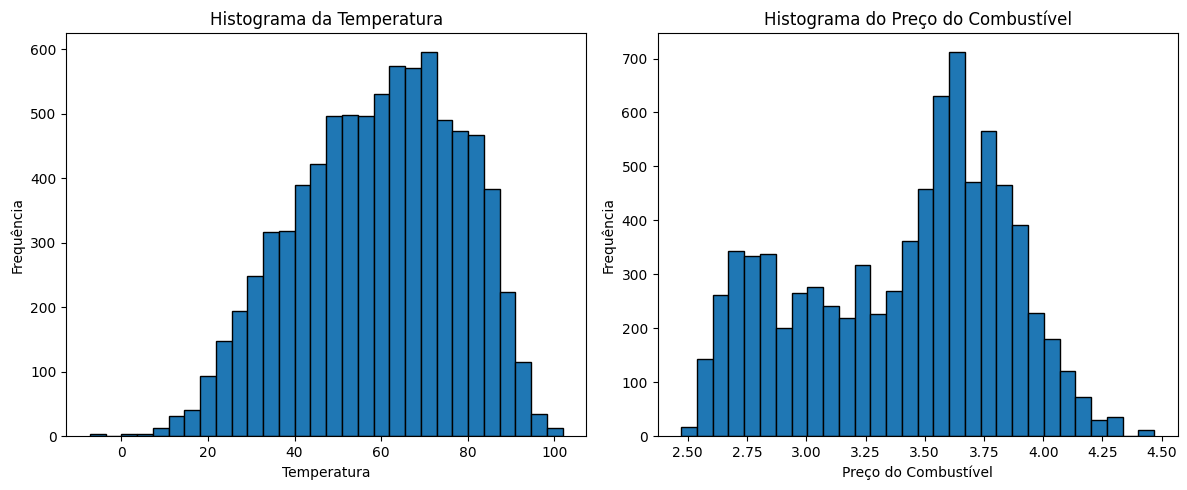

In [38]:
# Cria uma figura com 1 linha e 2 colunas de subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Primeiro histograma para a coluna 'Temperature'
axes[0].hist(df_features['Temperature'], bins=30, edgecolor='black')
axes[0].set_title('Histograma da Temperatura')
axes[0].set_xlabel('Temperatura')
axes[0].set_ylabel('Frequência')

# Segundo histograma para a coluna 'Fuel_Price'
axes[1].hist(df_features['Fuel_Price'], bins=30, edgecolor='black')
axes[1].set_title('Histograma do Preço do Combustível')
axes[1].set_xlabel('Preço do Combustível')
axes[1].set_ylabel('Frequência')

# Ajusta layout para evitar sobreposição
plt.tight_layout()
plt.show()


Text(0, 0.5, 'Frequência')

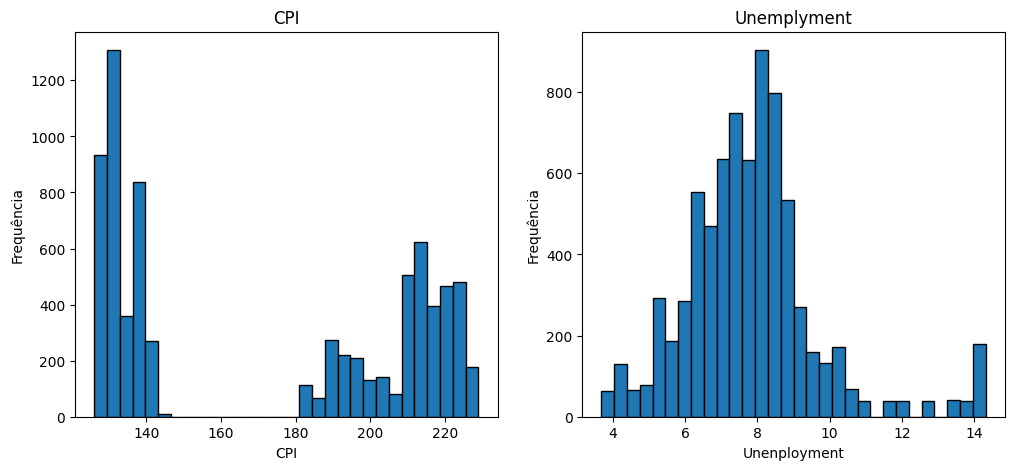

In [45]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
axes[0].hist(df_features['CPI'], bins=30, edgecolor='black')
axes[0].set_title('CPI')
axes[0].set_xlabel('CPI')
axes[0].set_ylabel('Frequência')

axes[1].hist(df_features['Unemployment'], bins=30, edgecolor='black')
axes[1].set_title('Unemplyment')
axes[1].set_xlabel('Unenployment')
axes[1].set_ylabel('Frequência')

Text(0.5, 1.0, 'Box plot de temperatura')

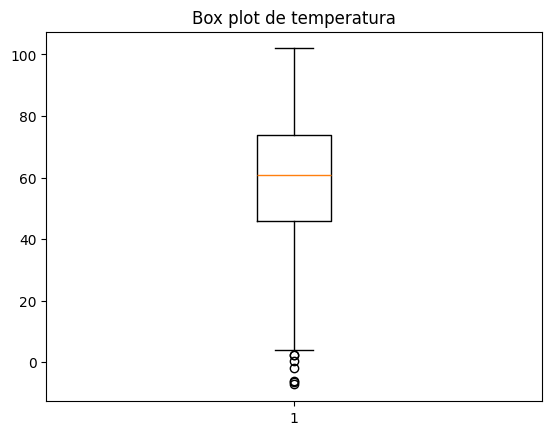

In [49]:
plt.boxplot(df_features['Temperature'].dropna())
plt.title('Box plot de temperatura')

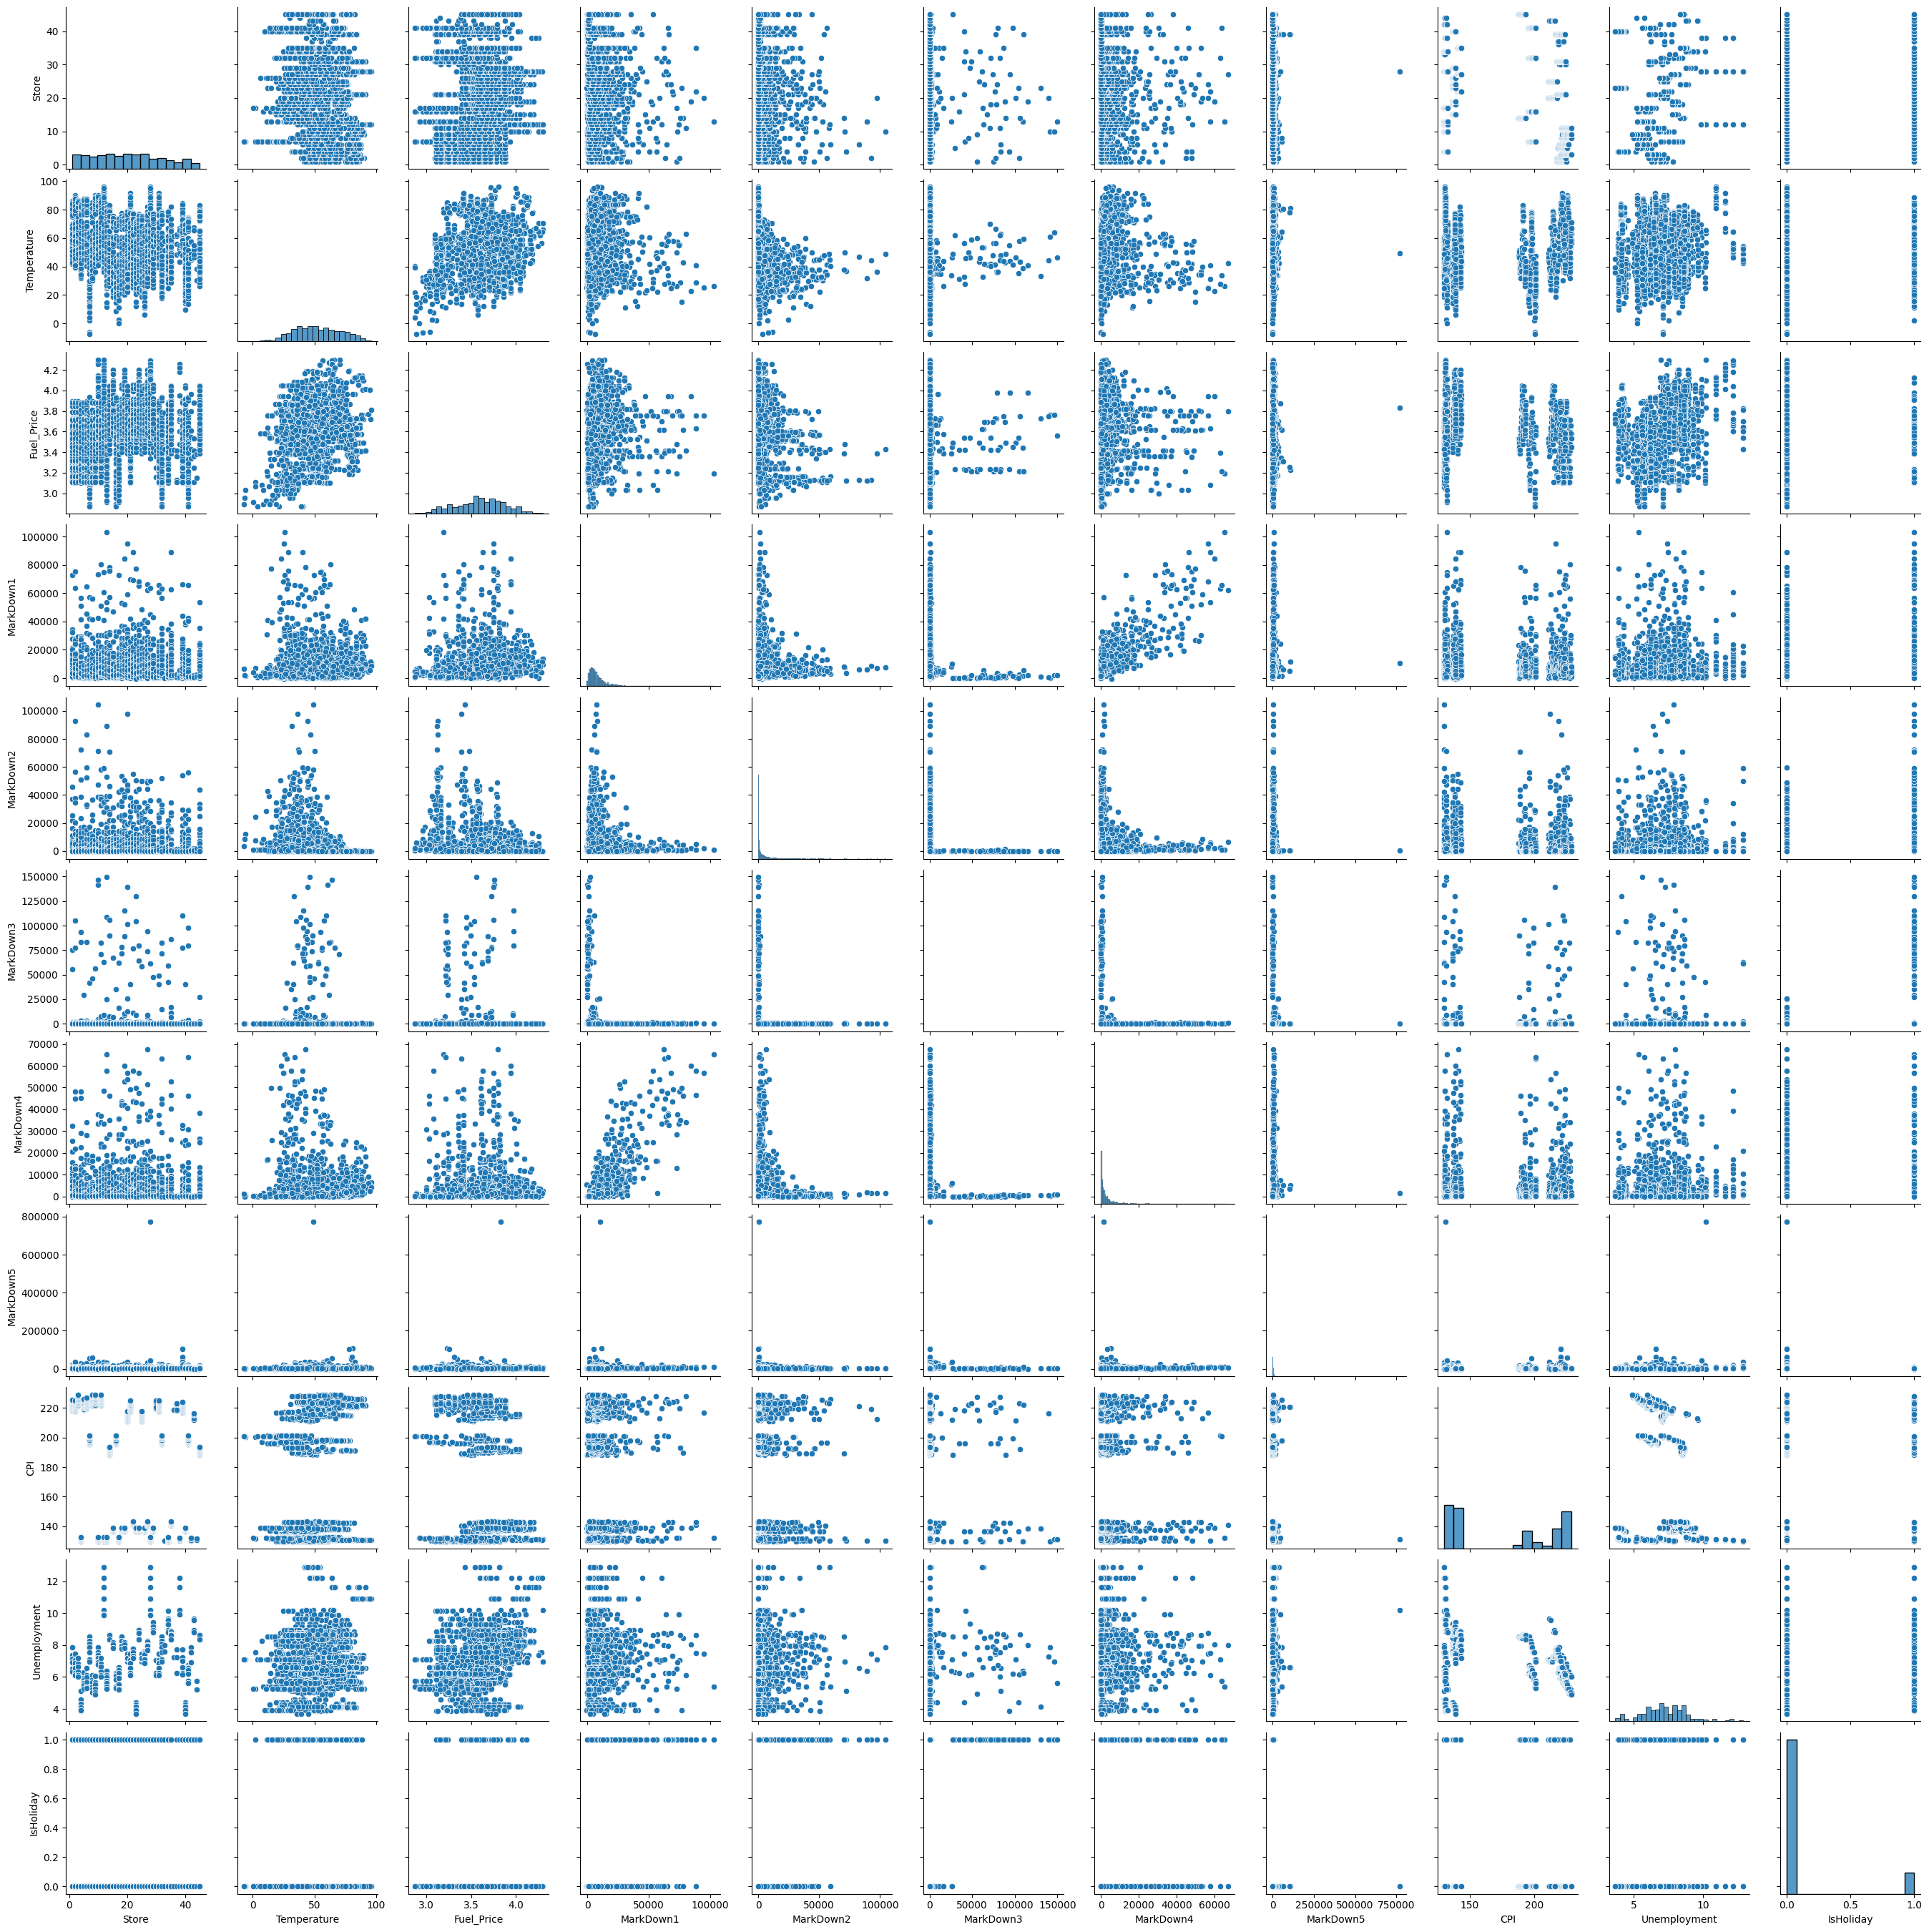

In [55]:
sns.pairplot(df_features.dropna())
plt.show()


In [51]:
print(df_features.describe())

             Store                 Date  Temperature   Fuel_Price  \
count  8190.000000                 8190  8190.000000  8190.000000   
mean     23.000000  2011-10-31 12:00:00    59.356198     3.405992   
min       1.000000  2010-02-05 00:00:00    -7.290000     2.472000   
25%      12.000000  2010-12-17 00:00:00    45.902500     3.041000   
50%      23.000000  2011-10-31 12:00:00    60.710000     3.513000   
75%      34.000000  2012-09-14 00:00:00    73.880000     3.743000   
max      45.000000  2013-07-26 00:00:00   101.950000     4.468000   
std      12.987966                  NaN    18.678607     0.431337   

           MarkDown1      MarkDown2      MarkDown3     MarkDown4  \
count    4032.000000    2921.000000    3613.000000   3464.000000   
mean     7032.371786    3384.176594    1760.100180   3292.935886   
min     -2781.450000    -265.760000    -179.260000      0.220000   
25%      1577.532500      68.880000       6.600000    304.687500   
50%      4743.580000     364.570000   

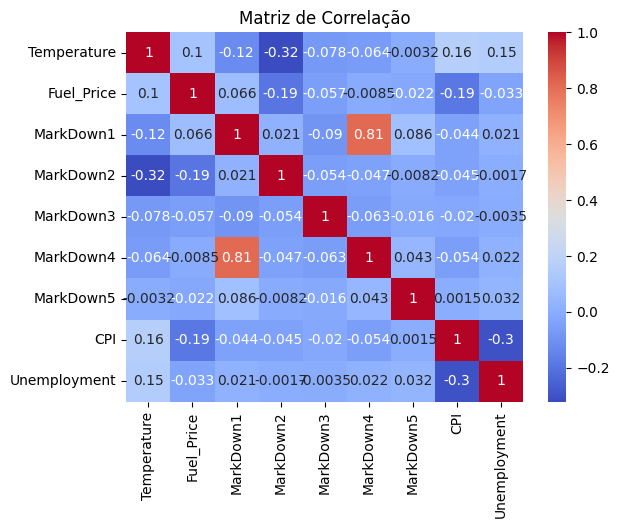

In [52]:
corr = df_features[['Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()


In [56]:
import pandas as pd

# Supondo que df_features é seu DataFrame
df_features['Date'] = pd.to_datetime(df_features['Date'])


In [57]:
df_features.set_index('Date', inplace=True)


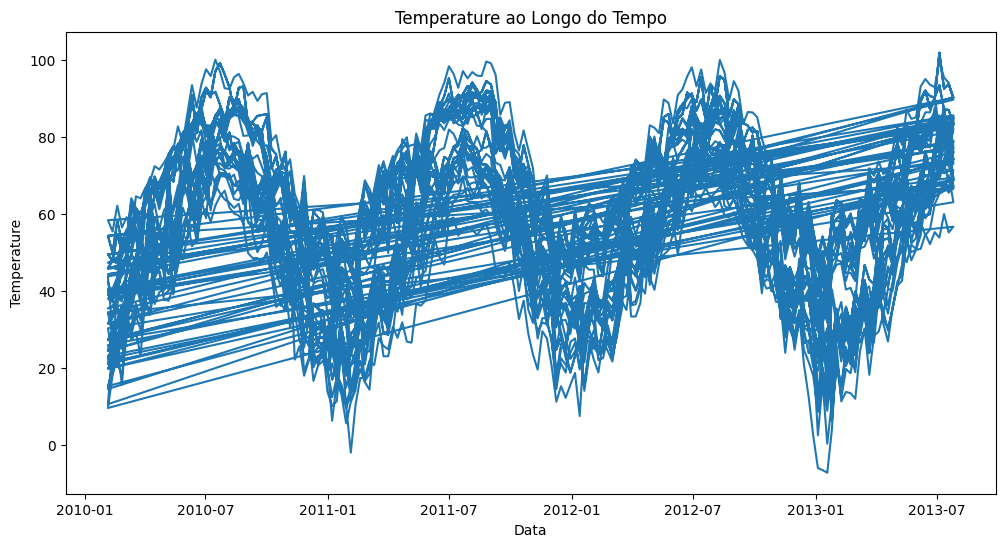

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_features.index, df_features['Temperature'])
plt.title('Temperature ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Temperature')
plt.show()


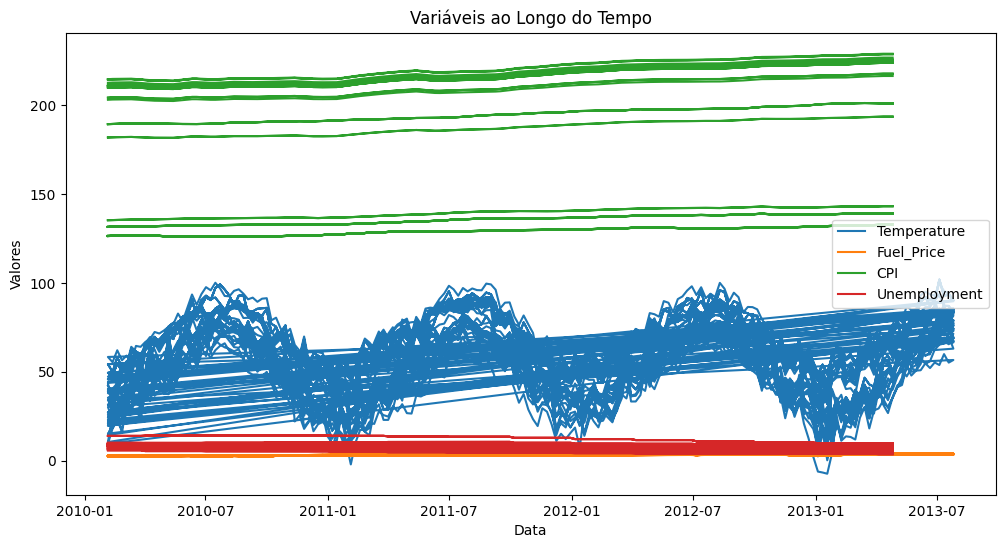

In [59]:
plt.figure(figsize=(12, 6))
plt.plot(df_features.index, df_features['Temperature'], label='Temperature')
plt.plot(df_features.index, df_features['Fuel_Price'], label='Fuel_Price')
plt.plot(df_features.index, df_features['CPI'], label='CPI')
plt.plot(df_features.index, df_features['Unemployment'], label='Unemployment')
plt.legend()
plt.title('Variáveis ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Valores')
plt.show()


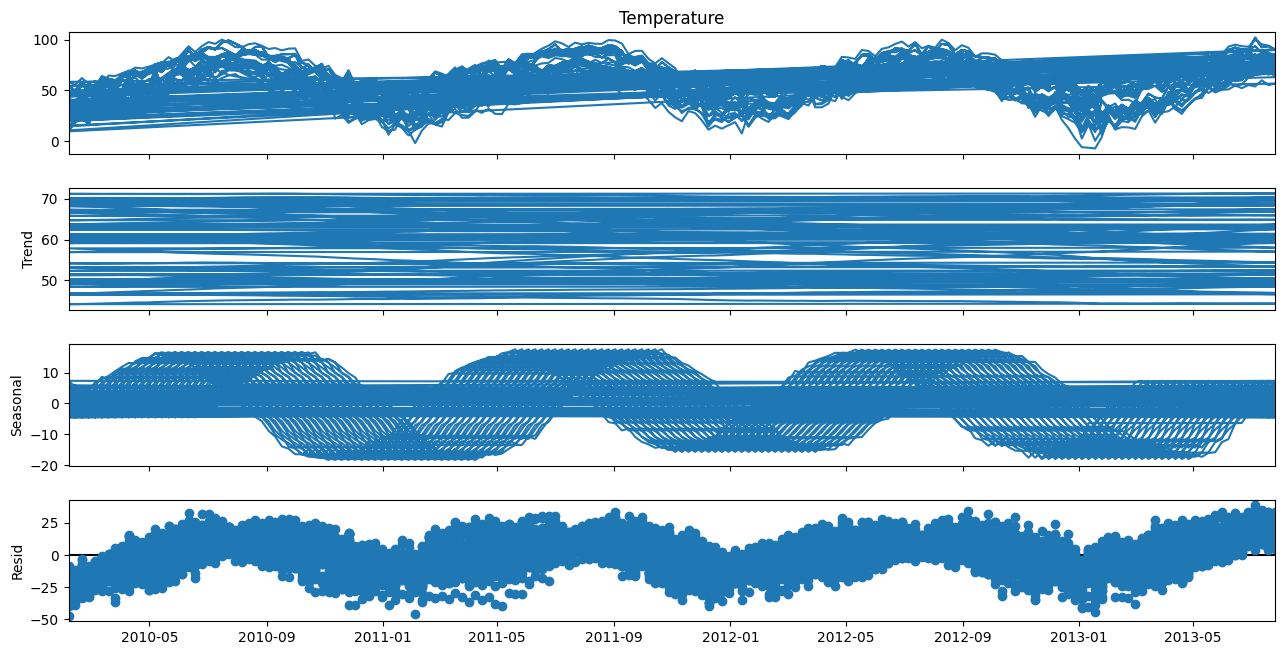

In [63]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompor a série temporal da temperatura
decomposition = seasonal_decompose(df_features['Temperature'], model='additive', period=365)
fig = decomposition.plot()
fig.set_size_inches(14, 7)
plt.show()


In [61]:
correlation_lagged = df_features['Temperature'].shift(1).corr(df_features['MarkDown2'])
print(f'Correlação defasada entre Temperature e MarkDown2: {correlation_lagged}')


Correlação defasada entre Temperature e MarkDown2: -0.291670556738159


C:\Users\gcampos\AppData\Local\Temp\ipykernel_28580\2165122527.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_summary = df_features.resample('M').mean()


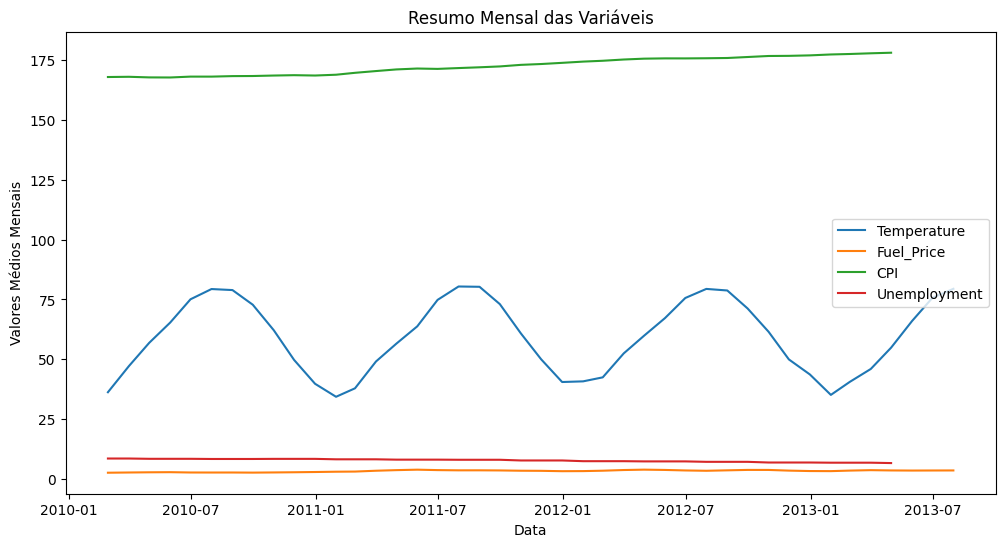

In [62]:
monthly_summary = df_features.resample('M').mean()

plt.figure(figsize=(12, 6))
plt.plot(monthly_summary.index, monthly_summary['Temperature'], label='Temperature')
plt.plot(monthly_summary.index, monthly_summary['Fuel_Price'], label='Fuel_Price')
plt.plot(monthly_summary.index, monthly_summary['CPI'], label='CPI')
plt.plot(monthly_summary.index, monthly_summary['Unemployment'], label='Unemployment')
plt.legend()
plt.title('Resumo Mensal das Variáveis')
plt.xlabel('Data')
plt.ylabel('Valores Médios Mensais')
plt.show()
